In [1]:
%load_ext autoreload
%autoreload 2

In [88]:
import sys
import os
import torch
import torchsummary

In [93]:
from experiments.autoencoders.config import Config
from experiments.autoencoders.data import get_dls
from experiments.autoencoders.models import Autoencoder

In [94]:
from legoml.utils.logging import get_logger
from legoml.utils.seed import set_seed

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

In [95]:
device = torch.device("mps")
set_seed(42)
config = Config(max_epochs=1, data_root="../../raw_data/")

In [96]:
model = Autoencoder()

In [97]:
model

Autoencoder(
  (0): Encoder(
    (0): Conv_3x3__BnAct__Pool(
      (0): Conv_3x3__BnAct(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    )
    (1): Conv_3x3__BnAct(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Conv_3x3__BnAct__Pool(
      (0): Conv_3x3__BnAct(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ce

In [107]:
from legoml.core.context import Context
from legoml.callbacks.checkpoint import CheckpointCallback

eval_context = Context(
    config=config,
    model=model,
    loss_fn=torch.nn.MSELoss(),
    device=device,
)

checkpoint_path = "../../runs/autoencoder/run_20250824_193922/artifacts/checkpoints/ckpt_last.pt"
_ = CheckpointCallback.load_into(
    context=eval_context,
    path=checkpoint_path,
    map_location=device.type,
)


In [99]:
train_dl, eval_dl = get_dls(config)

2025-08-24 19:41:00 [info     ] Created data loaders           train_size=938 val_size=313


In [100]:
single_batch = next(iter(eval_dl))

In [101]:
images = single_batch.inputs

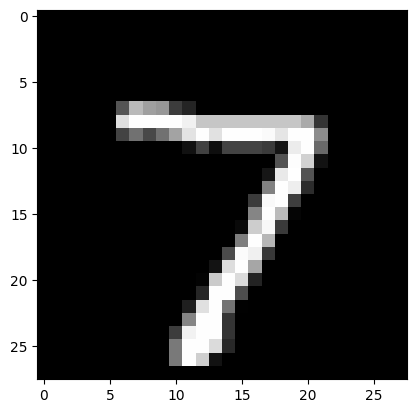

In [102]:
plt.imshow(images[0].reshape((28, 28, 1)), cmap="gray")
plt.show();

## Model Outputs

In [125]:
next(eval_context.model.parameters()).device

device(type='mps', index=0)

In [109]:
torchsummary.summary(eval_context.model.cpu(), images[0].shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             288
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 32, 14, 14]           9,216
       BatchNorm2d-6           [-1, 32, 14, 14]              64
              ReLU-7           [-1, 32, 14, 14]               0
            Conv2d-8           [-1, 64, 14, 14]          18,432
       BatchNorm2d-9           [-1, 64, 14, 14]             128
             ReLU-10           [-1, 64, 14, 14]               0
        MaxPool2d-11             [-1, 64, 7, 7]               0
           Conv2d-12             [-1, 64, 7, 7]          36,864
      BatchNorm2d-13             [-1, 64, 7, 7]             128
             ReLU-14             [-1, 6

In [110]:
_ = eval_context.model.to(device).eval()
with torch.no_grad():
    model_op = eval_context.model(images.to(device))

In [122]:
pred = model_op[3]

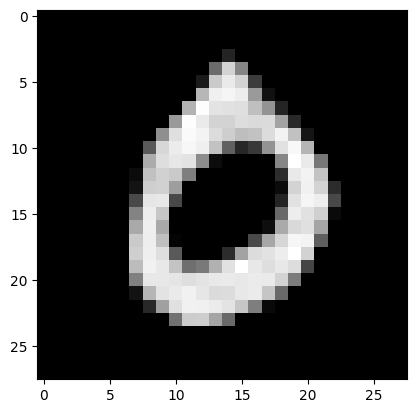

In [123]:
plt.imshow(pred.detach().cpu().reshape((28, 28, 1)), cmap="gray")

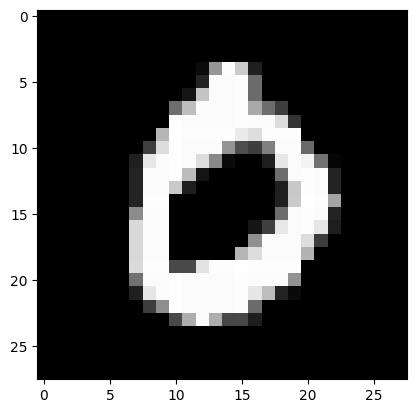

In [124]:
plt.imshow(images[3].reshape((28, 28, 1)), cmap="gray")
plt.show();